In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sp
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import linregress
from scipy import stats

%matplotlib inline
df = pd.read_csv('/Users/joshuarkarnad/Desktop/Thinkful/Data/NFL Play by Play 2009-2016 (v3).csv')

/Users/joshuarkarnad/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
nfl2009 = df[df['Season'] == 2009]
defavg = nfl2009[['DefensiveTeam', 'Yards.Gained']].groupby('DefensiveTeam').agg(np.mean).reset_index()
defavg.columns=['posteam', 'DefRating']
offavg = nfl2009[['posteam', 'Yards.Gained']].groupby('posteam').agg(np.mean).reset_index()
offavg.columns=['posteam', 'OffRating']
df = offavg.merge(df, on = 'posteam', how = 'left')
df = defavg.merge(df, on = 'posteam', how = 'left')

In [3]:
nfl2010 = df.loc[(df['Season'] == 2010),
     ['DefRating', 'OffRating', 'down', 'Yards.Gained', 
      'ydstogo', 'ScoreDiff', 'yrdline100', 'PlayType']
    ]
nfl2010 = nfl2010[(nfl2010['PlayType'] == 'Pass') | 
                  (nfl2010['PlayType'] == 'Run') | 
                  (nfl2010['PlayType'] == 'Sack')]

In [4]:
nfl2010correlationmatrix = nfl2010.corr()
print(nfl2010correlationmatrix)

              DefRating  OffRating      down  Yards.Gained   ydstogo  \
DefRating      1.000000   0.313119 -0.006761      0.009471 -0.001853   
OffRating      0.313119   1.000000 -0.016273      0.025107 -0.005131   
down          -0.006761  -0.016273  1.000000     -0.020329 -0.322664   
Yards.Gained   0.009471   0.025107 -0.020329      1.000000  0.082481   
ydstogo       -0.001853  -0.005131 -0.322664      0.082481  1.000000   
ScoreDiff      0.093483   0.104795  0.001468     -0.009605 -0.025811   
yrdline100    -0.023584  -0.037508 -0.078167      0.096731  0.248670   

              ScoreDiff  yrdline100  
DefRating      0.093483   -0.023584  
OffRating      0.104795   -0.037508  
down           0.001468   -0.078167  
Yards.Gained  -0.009605    0.096731  
ydstogo       -0.025811    0.248670  
ScoreDiff      1.000000   -0.031826  
yrdline100    -0.031826    1.000000  


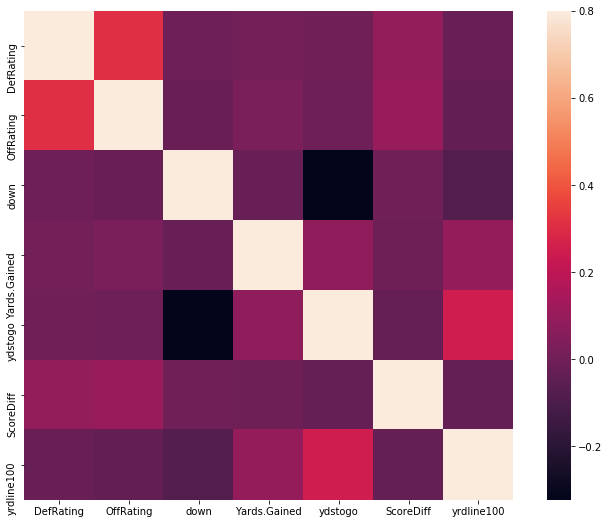

In [5]:
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(nfl2010correlationmatrix, vmax=.8, square=True)
plt.show()

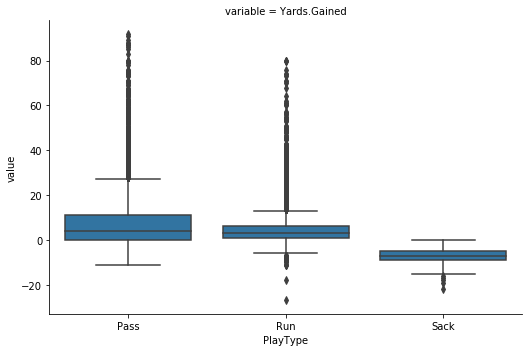

In [18]:
df_playtype =  nfl2010
df_playtype = pd.melt(df_playtype, id_vars=['PlayType'], 
                  value_vars = 'Yards.Gained')

g = sns.FacetGrid(df_playtype, col="variable", size=5, aspect=1.5)
g = g.map(sns.boxplot, "PlayType", "value")
plt.show()

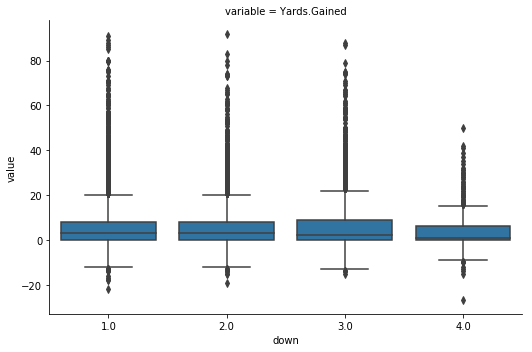

In [16]:
df_down =  nfl2010
df_down = pd.melt(df_down, id_vars=['down'], 
                  value_vars = 'Yards.Gained')

g = sns.FacetGrid(df_down, col="variable", size=5, aspect=1.5)
g = g.map(sns.boxplot, "down", "value")
plt.show()

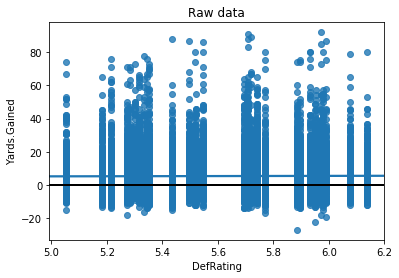

In [42]:
t = sns.regplot(
    'DefRating',
    'Yards.Gained',
    nfl2010,
    fit_reg=True
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

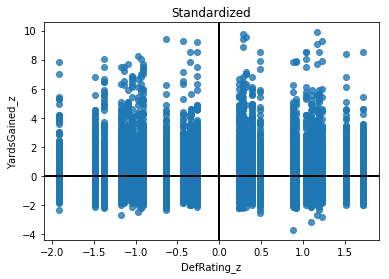

In [39]:
df_pca = nfl2010

df_pca['DefRating_z'] = (df_pca['DefRating'] - df_pca['DefRating'].mean()) / df_pca['DefRating'].std()
df_pca['YardsGained_z'] = (df_pca['Yards.Gained'] - df_pca['Yards.Gained'].mean()) / df_pca['Yards.Gained'].std()

t = sns.regplot(
    'DefRating_z',
    'YardsGained_z',
    df_pca,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized')
plt.show()

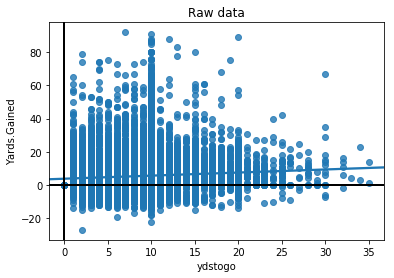

In [52]:
t = sns.regplot(
    'ydstogo',
    'Yards.Gained',
    nfl2010,
    fit_reg=True
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

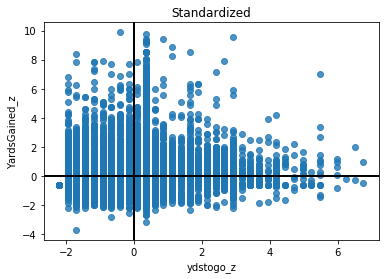

In [48]:
df_pca['ydstogo_z'] = (df_pca['ydstogo'] - df_pca['ydstogo'].mean()) / df_pca['ydstogo'].std()

t = sns.regplot(
    'ydstogo_z',
    'YardsGained_z',
    df_pca,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized')
plt.show()

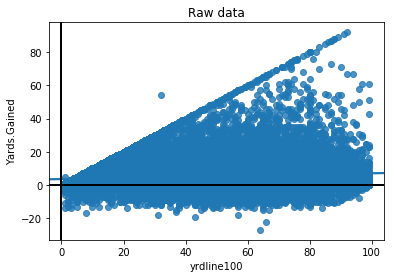

In [49]:
t = sns.regplot(
    'yrdline100',
    'Yards.Gained',
    nfl2010,
    fit_reg=True
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

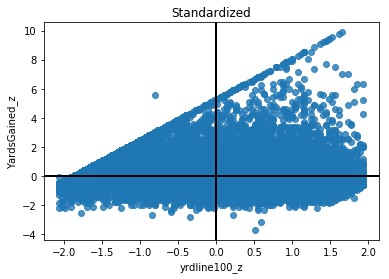

In [50]:
df_pca['yrdline100_z'] = (df_pca['yrdline100'] - df_pca['yrdline100'].mean()) / df_pca['yrdline100'].std()

t = sns.regplot(
    'yrdline100_z',
    'YardsGained_z',
    df_pca,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized')
plt.show()

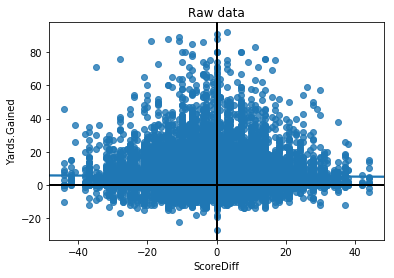

In [53]:
t = sns.regplot(
    'ScoreDiff',
    'Yards.Gained',
    nfl2010,
    fit_reg=True
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

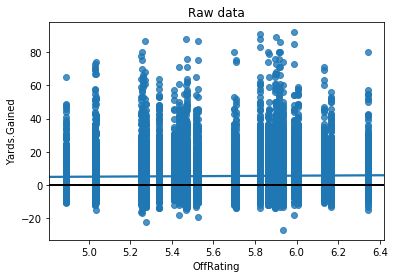

In [54]:
t = sns.regplot(
    'OffRating',
    'Yards.Gained',
    nfl2010,
    fit_reg=True
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()